In [1]:
import pandas as pd
import numpy as np
data='https://github.com/santoh15/ML-zoomcamp/blob/main/data.csv?plain=1'
!wget $data

--2025-12-10 20:34:41--  https://github.com/santoh15/ML-zoomcamp/blob/main/data.csv?plain=1
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.csv?plain=1.4’

data.csv?plain=1.4      [ <=>                ]   1.61M  --.-KB/s    in 0.04s   

2025-12-10 20:34:42 (41.1 MB/s) - ‘data.csv?plain=1.4’ saved [1691810]



In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [4]:
strings=list(df.dtypes[df.dtypes == 'object'].index)

In [5]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_')
    

In [7]:
df.dtypes
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

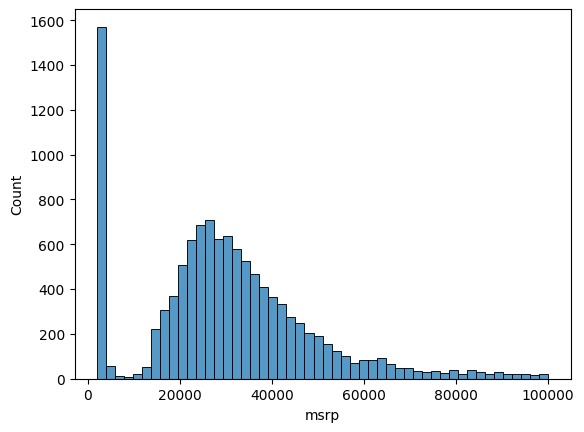

In [10]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)

In [11]:
price_logs= np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

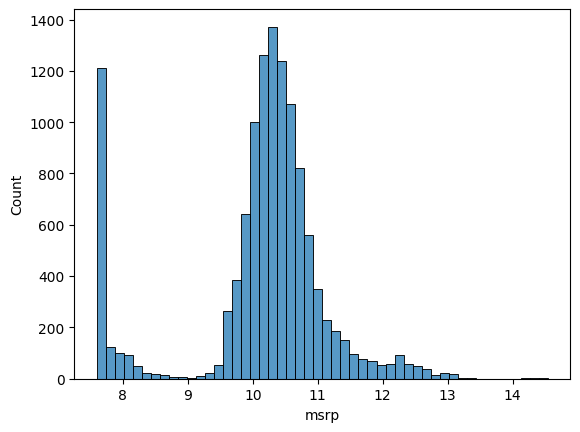

In [12]:
sns.histplot(price_logs, bins=50)

In [13]:
  df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [14]:
n=len(df)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test
n,n_val+n_train+n_test

(11914, 11914)

In [15]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [16]:
indice=np.arange(n)
np.random.seed(2)
np.random.shuffle(indice)

In [17]:
age=2025-df.year
df['age']=age
df['num_doors_2'] = (df.number_of_doors == 2).astype('int')
df['num_doors_3'] = (df.number_of_doors == 3).astype('int')
df['num_doors_4'] = (df.number_of_doors == 4).astype('int')
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity','age','num_doors_2','num_doors_3','num_doors_4']

In [18]:
df_train=df.iloc[indice[:n_train]]
df_test=df.iloc[indice[n_train:n_train+n_test]]
df_val=df.iloc[indice[n_train+n_test:n_train+n_test+n_val]]

In [19]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [20]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [21]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [22]:
def dot(xi,w):
    n=len(xi)
    res=0.0
    for j in range(n):
        res=res+xi[j]*w[j]
    return res 

In [24]:
def train_linear_regression(X,y):
    ones= np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [25]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                    int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [26]:
X_train=df_train[base].fillna(0)

In [27]:
w0,w=train_linear_regression(X_train,y_train)

In [28]:
y_pred=w0+X_train.dot(w)

<Axes: ylabel='Count'>

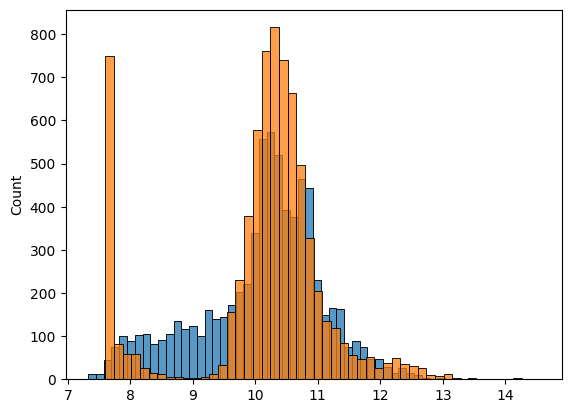

In [29]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_train,bins=50)

In [29]:
def mrse(y,y_pred):
    error=y-y_pred
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

In [31]:
import regresion.py

NameError: name 'null' is not defined

In [30]:
mrse(y_train,y_pred)

np.float64(0.5150615580371418)

Hacemos la preparación de datos una función

In [31]:
def preparar_X(df):
    df_num=df[base].fillna(0)
    X=df_num.values
    return X

In [32]:
X_train=preparar_X(df_train)
w0,w=train_linear_regression(X_train,y_train)

X_val=preparar_X(df_val)
y_pred=w0+X_val.dot(w)
mrse(y_val, y_pred)

np.float64(0.5133819172832805)

<Axes: ylabel='Count'>

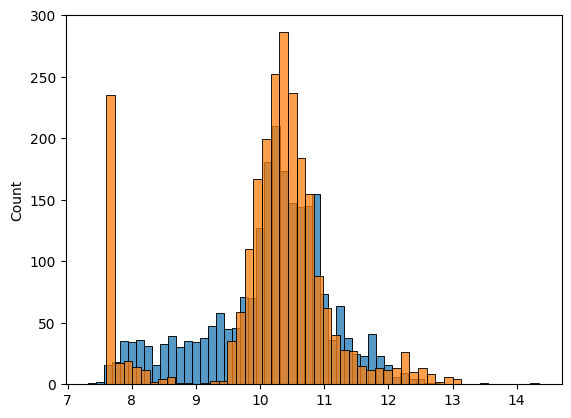

In [33]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_val,bins=50)

In [34]:
def train_linear_regression_reg(X,y,r):
    ones= np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [35]:
for j in [0.0001,0.001,0.01,0.1,1,10,100]:
    w0,w=train_linear_regression_reg(X_train,y_train,r=j)
    X_val=preparar_X(df_val)
    y_pred=w0+X_val.dot(w)
    score=mrse(y_val,y_pred)
    print(j,score)

0.0001 0.5133819032346538
0.001 0.5133817774220699
0.01 0.5133805805593611
0.1 0.5133741370675021
1 0.513571220998834
10 0.5205465333908572
100 0.6963861169835663


In [36]:
df_full_train= pd.concat([df_train,df_val])

In [37]:
df_full_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,age,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,17,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,13,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,9,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,34,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,27,0,1,0
9528,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,11,0,0,1
9529,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,19,0,0,1
9530,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,9,0,0,1


In [39]:
X_full_train=preparar_X(df_full_train)
y_full_train=np.concatenate([y_train,y_val])

In [42]:
w0,w=train_linear_regression_reg(X_full_train,y_full_train,r=0.1)
X_test=preparar_X(df_test)
y_pred=w0+X_test.dot(w)

In [43]:
mrse(y_test,y_pred)

np.float64(0.5160502146725556)

In [45]:
precio=np.exp(y_pred[0]-1)

In [46]:
precio

np.float64(10346.463931810049)

In [48]:
np.exp(y_test[0]-1)

np.float64(9890.806655335404)